# Spaceship Titanic

## Limpieza y Procesamiento de Datos

## Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

le = LabelEncoder()

In [2]:
# Import de librerías
df = pd.read_csv("train.csv")
df.drop(columns=['PassengerId','Name'],inplace=True)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [3]:
# Valores nulos
df.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [4]:
# Visualización de los tipos de datos con los que toca trabajar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


Al visualizar las columnas, vemos que las columnas **'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' y 'VRDeck'** representan gastos del pasajero en distintos servicios por lo que decidimos crear una lista para representar esos datos

In [5]:
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [6]:
df[amenities].isna().sum()

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

Visualizamos la cantidad de datos nulos en estas columnas y decidimos rellenar con 0 todos los datos faltantes en **amenities**

In [7]:
df[amenities] = df[amenities].fillna(0.0)

In [8]:
print('Porcentaje de personas en CryoSleep:')
print(round(df['CryoSleep'].value_counts() / len(df) * 100, 2))

print('\nPagos en amenidades de quienes están en CryoSleep:')
print(df[df['CryoSleep'] == True][amenities].max())
print('\nPagos en amenidades de quienes NO están en CryoSleep:')
print(df[df['CryoSleep'] == False][amenities].mean())

Porcentaje de personas en CryoSleep:
CryoSleep
False    62.57
True     34.94
Name: count, dtype: float64

Pagos en amenidades de quienes están en CryoSleep:
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

Pagos en amenidades de quienes NO están en CryoSleep:
RoomService     343.000919
FoodCourt       698.584299
ShoppingMall    265.412576
Spa             475.993933
VRDeck          465.307961
dtype: float64


Para la columna **CryoSleep** buscamos relación con otras columnas.
En este caso, se encontró que las personas que están en **CryoSleep**, al no estar despiertas, no pagan por las amenidades
Y por el contrario, las personas que no están en **CryoSleep**, pagan por las amenidades,
lo que indica que se puede imputar el valor nulo con False si no pagan por las amenidades

In [9]:
# Imputación de datos en Cryosleep
df['CryoSleep'] = df['CryoSleep'].fillna(df.apply(lambda row: False if any(row[amenities] > 0) else True, axis=1))
df['CryoSleep'] = df['CryoSleep'].astype('category').cat.codes

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/1133748176.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(df.apply(lambda row: False if any(row[amenities] > 0) else True, axis=1))


Ahora intentamos lo mismo para la columna **VIP**

In [10]:
print('Porcentaje de personas en VIP:')
print(round(df['VIP'].value_counts() / len(df) * 100, 2))

print('\nPagos en amenidades de quienes están en VIP:')
print(df[df['VIP'] == True][amenities].mean())
print('\nPagos en amenidades de quienes NO están en VIP:')
print(df[df['VIP'] == False][amenities].mean())

Porcentaje de personas en VIP:
VIP
False    95.38
True      2.29
Name: count, dtype: float64

Pagos en amenidades de quienes están en VIP:
RoomService      464.095477
FoodCourt       1756.778894
ShoppingMall     241.502513
Spa              753.065327
VRDeck          1210.035176
dtype: float64

Pagos en amenidades de quienes NO están en VIP:
RoomService     212.686045
FoodCourt       417.440598
ShoppingMall    169.702931
Spa             295.197202
VRDeck          276.477868
dtype: float64


Podemos ver que el promedio de gasto en comida y entretenimiento VR es muchísimo más elevado para los pasajeros **VIP**. Ningún servicio cuenta con un promedio cercano a mil para los pasajeros que no son **VIP**. Es por esto que decidimos imputar los valores faltantes con el siguiente criterio:

In [11]:
df['VIP'] = df['VIP'].fillna(df.apply(lambda row: False if any(row[amenities] < 1000) else True, axis=1))

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/2204171891.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(df.apply(lambda row: False if any(row[amenities] < 1000) else True, axis=1))


Hasta ahora hemos visto que las amenidades nos bridan mucha información sobre los pasajeros. Es por esto que decidimos crear una columna que represente la suma de todas las amenidades. **Spent**

In [12]:
df['Spent'] = df[amenities].sum(axis=1)

In [13]:
# Visualizamos qué datos aun necesitan manejo de nulos 
df.isna().sum()

HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Spent             0
dtype: int64

**Destination** es una columna que aun necesita manejo de datos nulos. Decidimos visualizar el promedio de gasto de los pasajeros agrupados por destino

In [14]:
print('PSO J318.5-22',df[df['Destination'] == 'PSO J318.5-22']['Spent'].mean())
print()
print('TRAPPIST-1e',df[df['Destination'] == 'TRAPPIST-1e']['Spent'].mean())
print()
print('55 Cancri e',df[df['Destination'] == '55 Cancri e']['Spent'].mean())


PSO J318.5-22 572.3153266331658

TRAPPIST-1e 1338.3399830938292

55 Cancri e 2180.2855555555557


Los pasajeros con destino a *55 Cancri e* tienen un promedio de gasto mucho más elevado que los pasajeros con destino a *PSO J318.5-22*, los pasajeros con destino a *TRAPPIST-1e* son el punto medio. Esta información es muy valiosa ya que ahora podemos hacernos una idea de a qué destino va un pasajero a partir de sus gastos en amenidades

In [15]:
# Definimos los thersholds de criterio para llenar valores nulos
print((1338.3399830938292 + 572.3153266331658) / 2)

print((1338.3399830938292 + 2180.2855555555557) / 2)

955.3276548634975
1759.3127693246925


In [16]:
df['Destination'].fillna(df.apply(lambda row: 'PSO J318.5-22' if row['Spent'] < 955.3276548634975
                                  else 'TRAPPIST-1e' if 955.3276548634975 <= row['Spent'] < 1759.3127693246925
                                  else '55 Cancri e', axis=1), inplace=True)

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/1525798028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Destination'].fillna(df.apply(lambda row: 'PSO J318.5-22' if row['Spent'] < 955.3276548634975


In [17]:
df['Destination'] = df['Destination'].replace('55 Cancri e',0)
df['Destination'] = df['Destination'].replace('PSO J318.5-22',1)
df['Destination'] = df['Destination'].replace('TRAPPIST-1e',2)

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/1033528344.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Destination'] = df['Destination'].replace('TRAPPIST-1e',2)


**HomePlanet** y **Age** son columnan a la que después de hacer MUCHAS pruebas, decidimos llenar con un KNN Imputer. Para esto, es necesario asegurarnos que ambas columnas sean de tipo numérica/categórica.

In [18]:
df['HomePlanet'] = df['HomePlanet'].astype('category').cat.codes

imputer = KNNImputer(n_neighbors=5)
df[['HomePlanet', 'Age']] = imputer.fit_transform(df[['HomePlanet', 'Age']])

La columna **Cabin** puede ocultar información adicional. Ya que según Kaggle, aquí se almacena Zone/Seat/Side. Esta información es fácilmente extraíble ya que es un patrón de string. Esta extracción implica eliminar la columna **Cabin** para ahora tener **Zona**, **Seat** y **Side**.

In [19]:
df[['Zona', 'Seat', 'Side']] = df['Cabin'].str.split('/', expand=True)
df.drop(columns=['Cabin'], inplace=True)
print(df['Side'].value_counts())
df['Side'] = df['Side'].astype('category').cat.codes

Side
S    4288
P    4206
Name: count, dtype: int64


Después de muchas pruebas, decidimos también borrar la columna **Seat**

In [20]:
df.drop(columns=['Seat'],inplace=True)
df.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Spent             0
Zona            199
Side              0
dtype: int64

Para la columna **Zona**, vemos que tiene muchos valores posibles. Decidimos convertirla a numérica dependiendo del gasto promedio en amenidades.

In [21]:
df['Zona'].value_counts()

Zona
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [22]:
for zona in df['Zona'].value_counts().index:
    print(df[df['Zona'] == zona].shape[0])
    print(zona, df[df['Zona'] == zona]['Spent'].mean())
    print()

2794
F 982.7662848962061

2559
G 381.03516998827666

876
E 1298.7728310502282

779
B 2927.8331193838253

747
C 4105.906291834002

478
D 2289.520920502092

256
A 3402.3046875

5
T 4716.4



In [23]:
df['Zona'].replace('G', 0, inplace=True)
df['Zona'].replace('F', 1, inplace=True)
df['Zona'].replace('E', 2, inplace=True)
df['Zona'].replace('D', 3, inplace=True)
df['Zona'].replace('B', 4, inplace=True)
df['Zona'].replace('A', 5, inplace=True)
df['Zona'].replace('C', 6, inplace=True)
df['Zona'].replace('T', 7, inplace=True)

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/1989790465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Zona'].replace('G', 0, inplace=True)
/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/1989790465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Ya que la columna es numérica, podemos llenar los valores faltantes con un KNN Imputer.

In [24]:
df['Zona'] = imputer.fit_transform(df[['Zona']])

In [25]:
df.dtypes

HomePlanet      float64
CryoSleep          int8
Destination       int64
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Spent           float64
Zona            float64
Side               int8
dtype: object

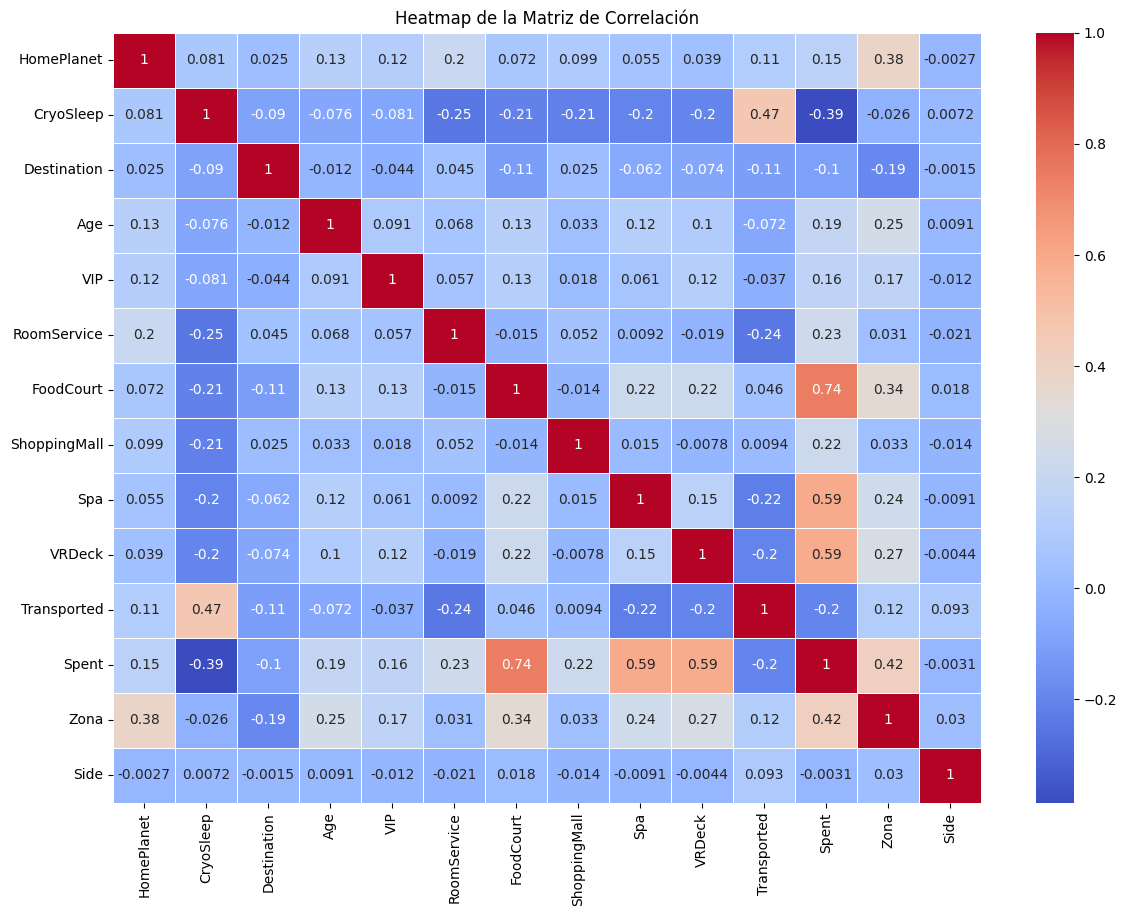

In [26]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un heatmap para la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/2535173255.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transported', y=col, data=df, palette='Set2')
/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/2535173255.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transported', y=col, data=df, palette='Set2')
/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/2535173255.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transported', y=col, data=df, palette='Set2')
/var/folders/

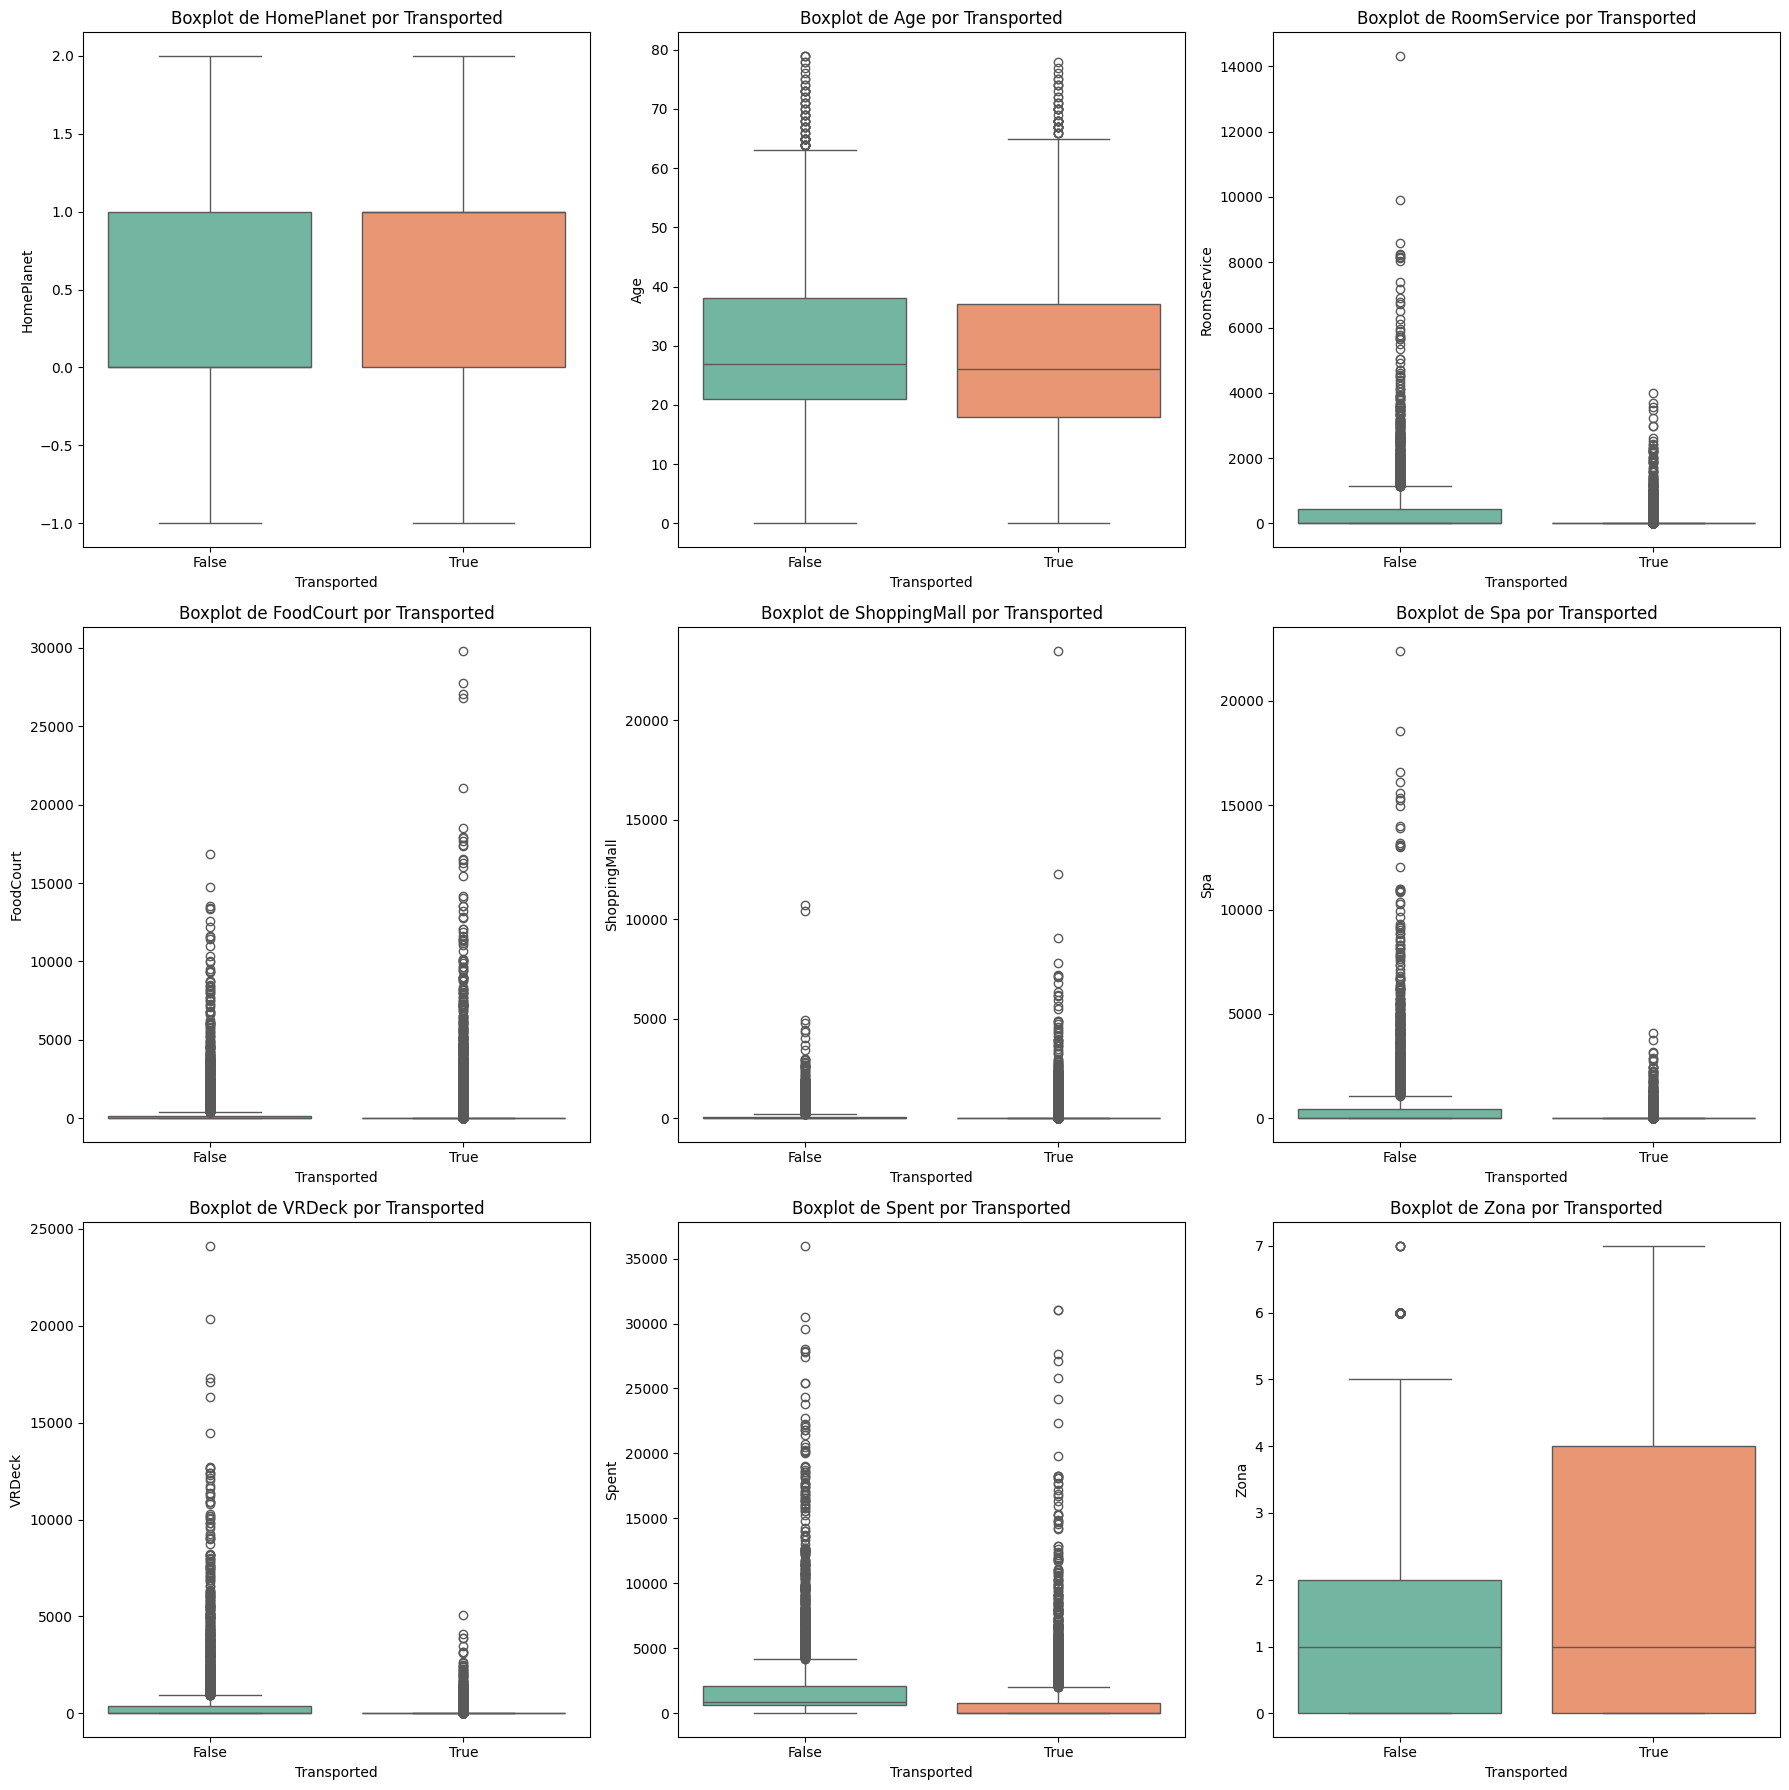

In [27]:
# Seleccionar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['float64']).columns

# Calcular el número de filas y columnas necesarias para la cuadrícula
n_cols = 3  # Número de columnas deseado
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calcular dinámicamente el número de filas

# Crear los box plots para cada variable numérica
plt.figure(figsize=(18, 6 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Transported', y=col, data=df, palette='Set2')
    plt.title(f'Boxplot de {col} por Transported')
plt.tight_layout()
plt.show()

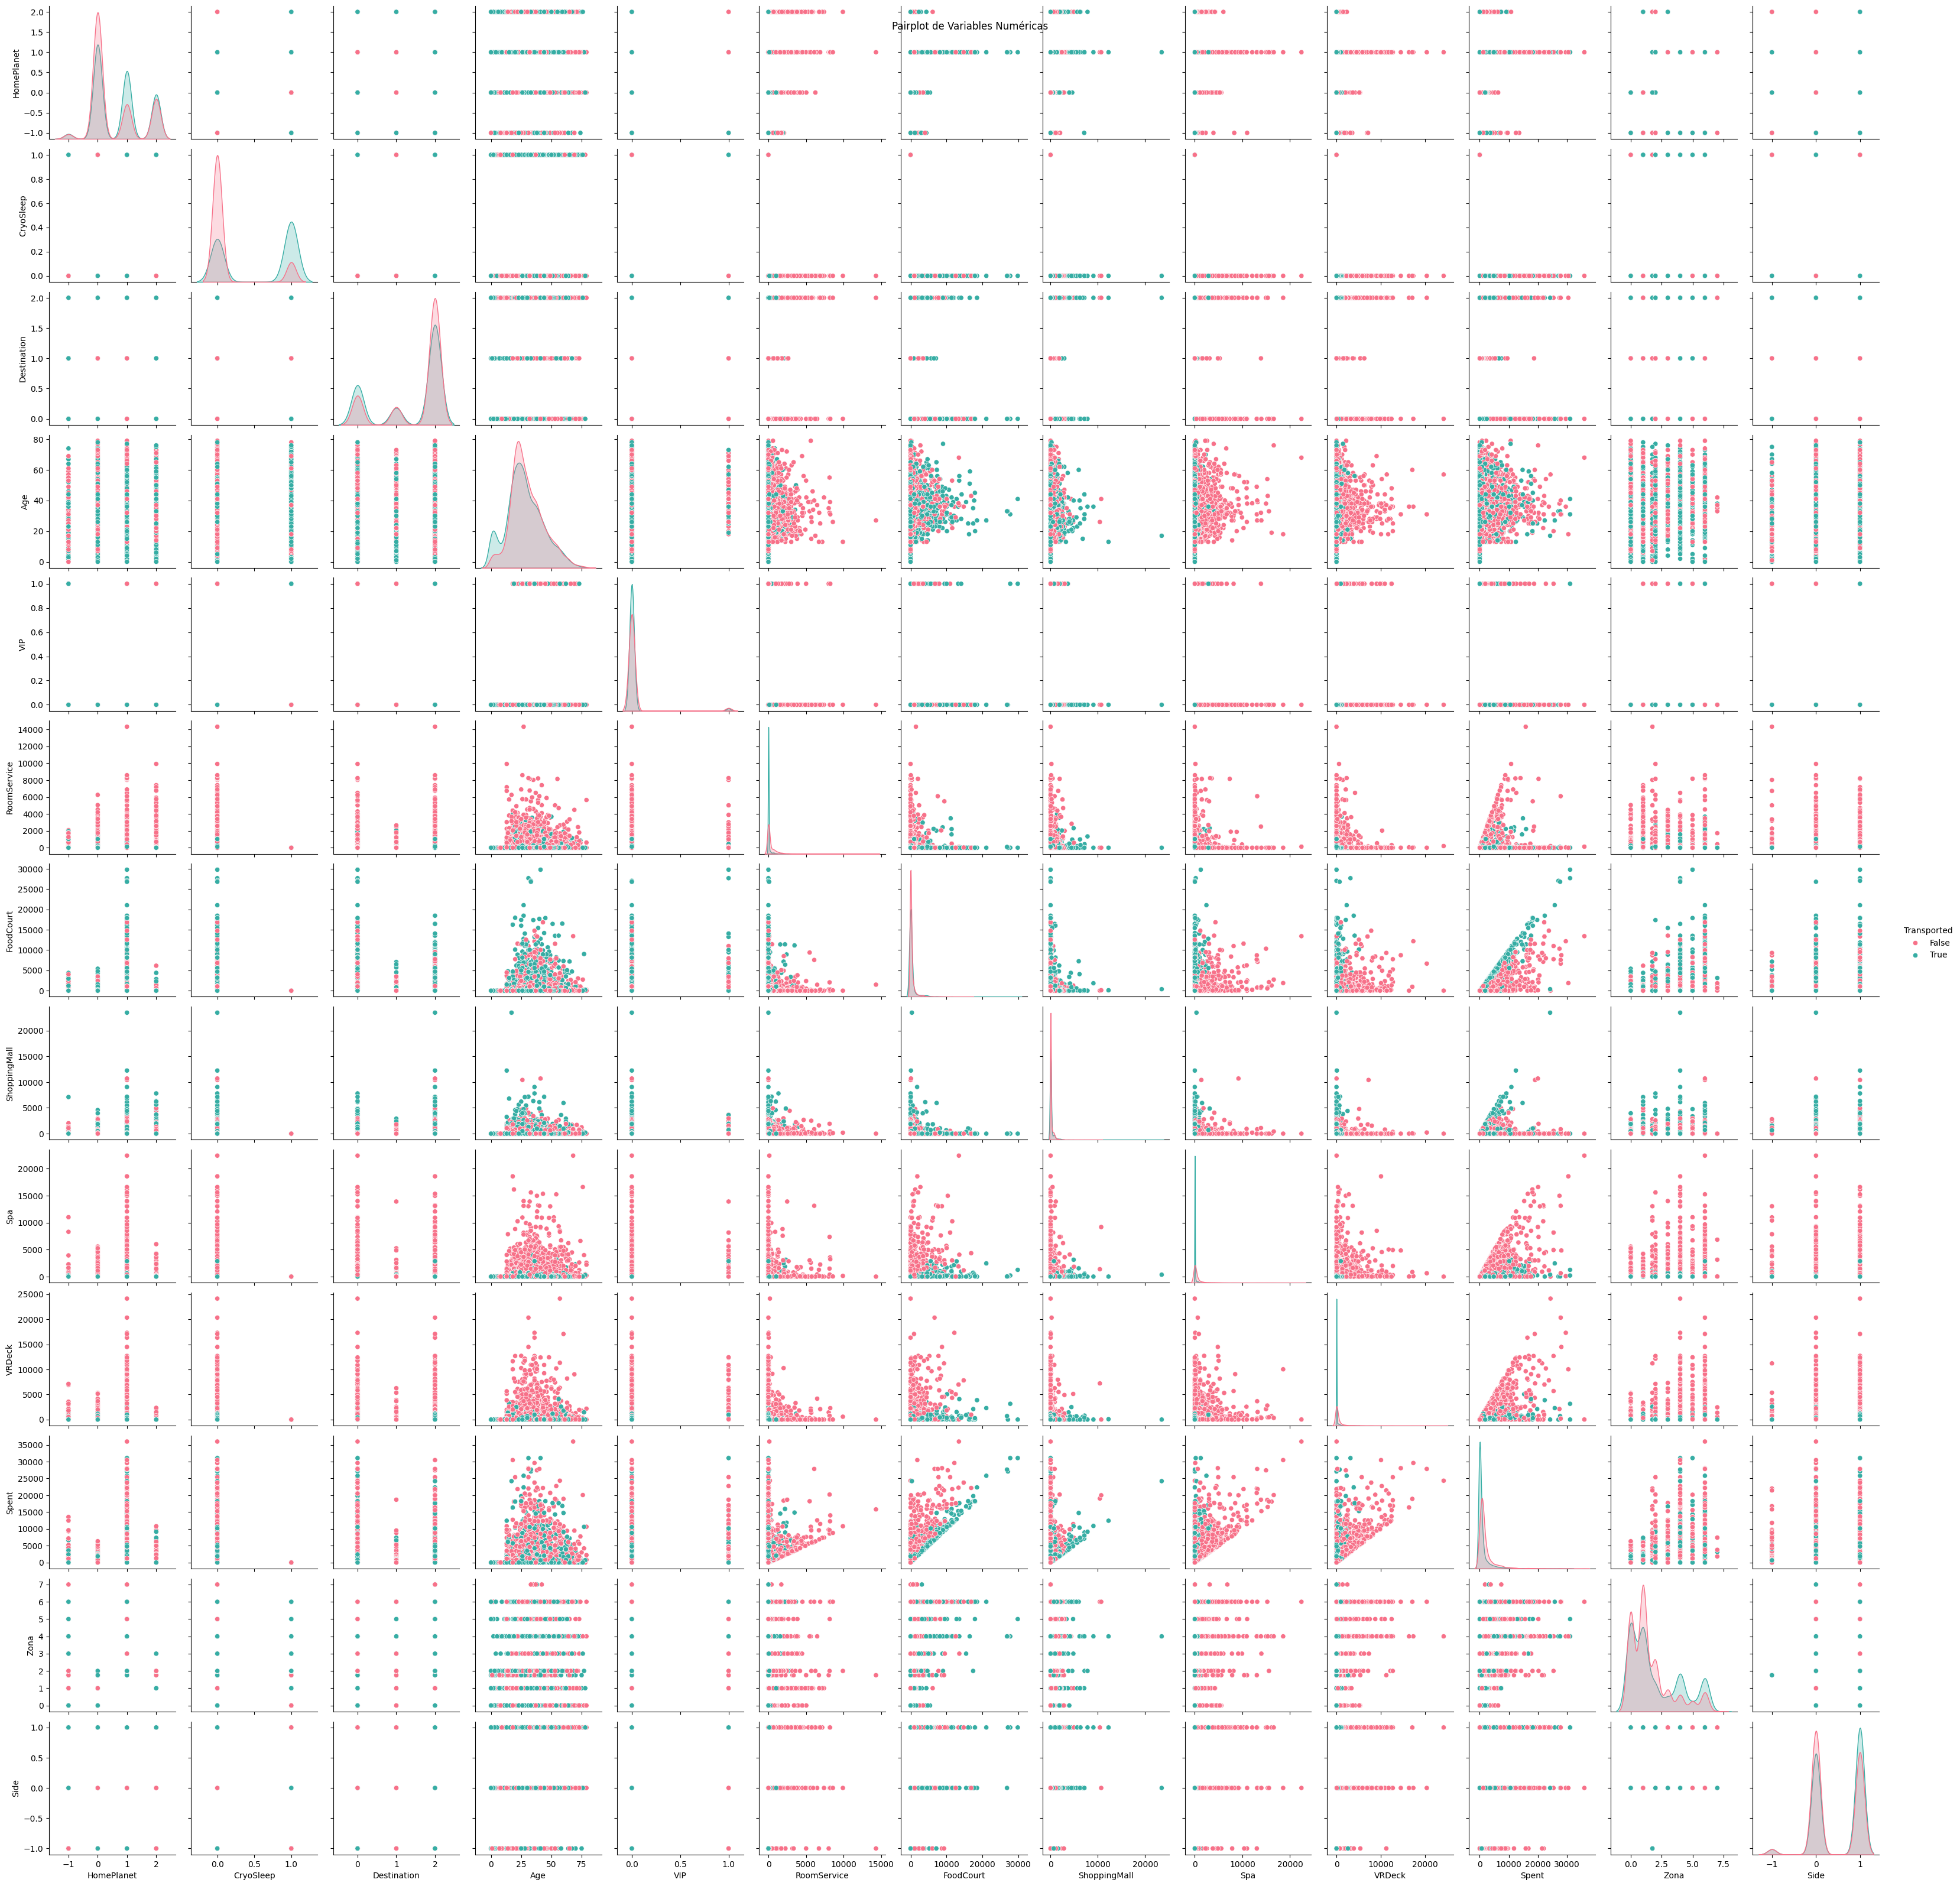

In [28]:
# 1. Pairplot para visualizar relaciones entre variables
sns.pairplot(df, hue='Transported', palette='husl')
plt.suptitle('Pairplot de Variables Numéricas')
plt.show()

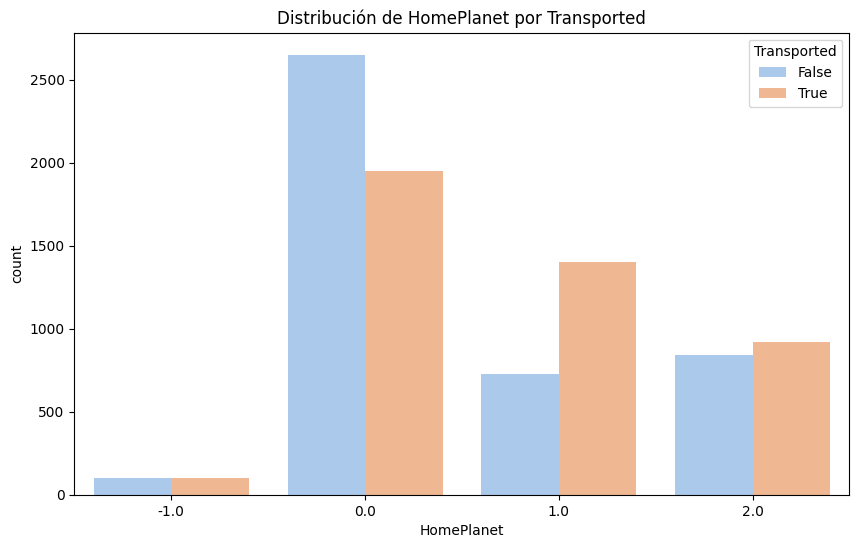

In [29]:
# 2. Countplot para visualizar la distribución de una variable categórica
plt.figure(figsize=(10, 6))
sns.countplot(x='HomePlanet', hue='Transported', data=df, palette='pastel')
plt.title('Distribución de HomePlanet por Transported')
plt.show()

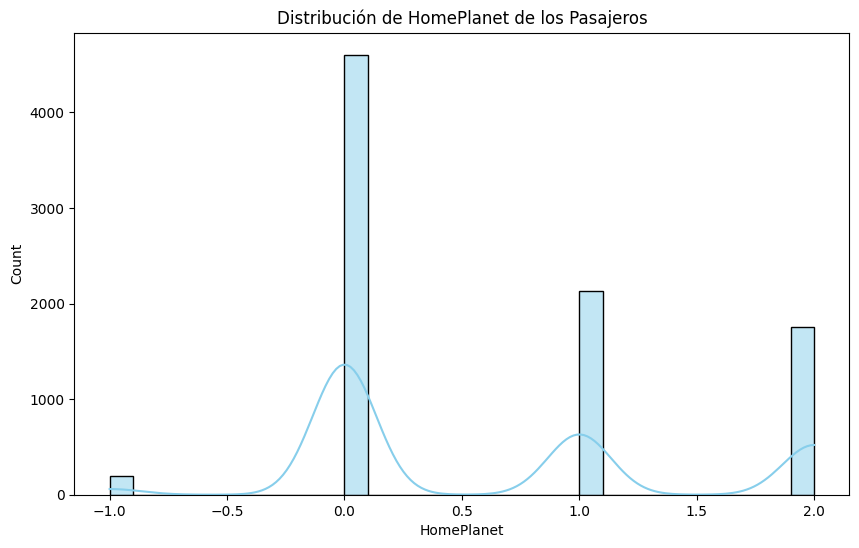

In [30]:
# 3. Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['HomePlanet'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de HomePlanet de los Pasajeros')
plt.show()

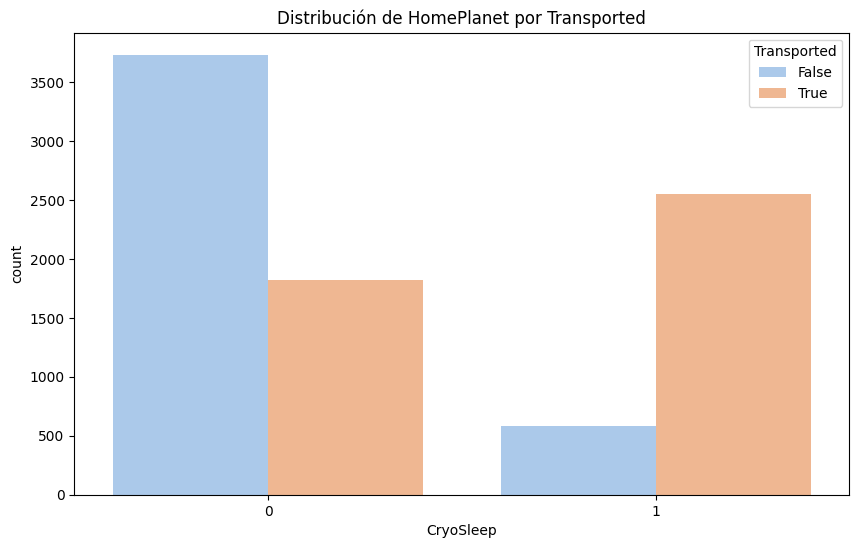

In [31]:
# 2. Countplot para visualizar la distribución de una variable categórica
plt.figure(figsize=(10, 6))
sns.countplot(x='CryoSleep', hue='Transported', data=df, palette='pastel')
plt.title('Distribución de HomePlanet por Transported')
plt.show()

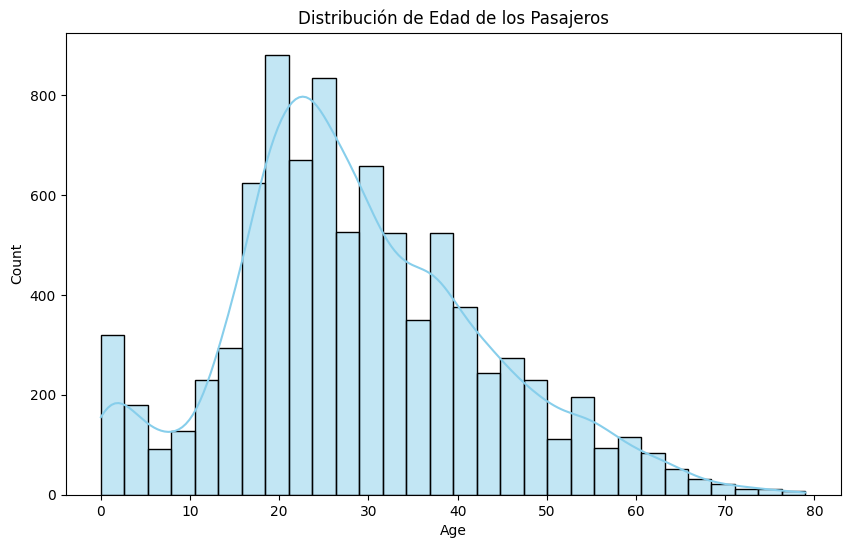

In [32]:
# 3. Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Edad de los Pasajeros')
plt.show()

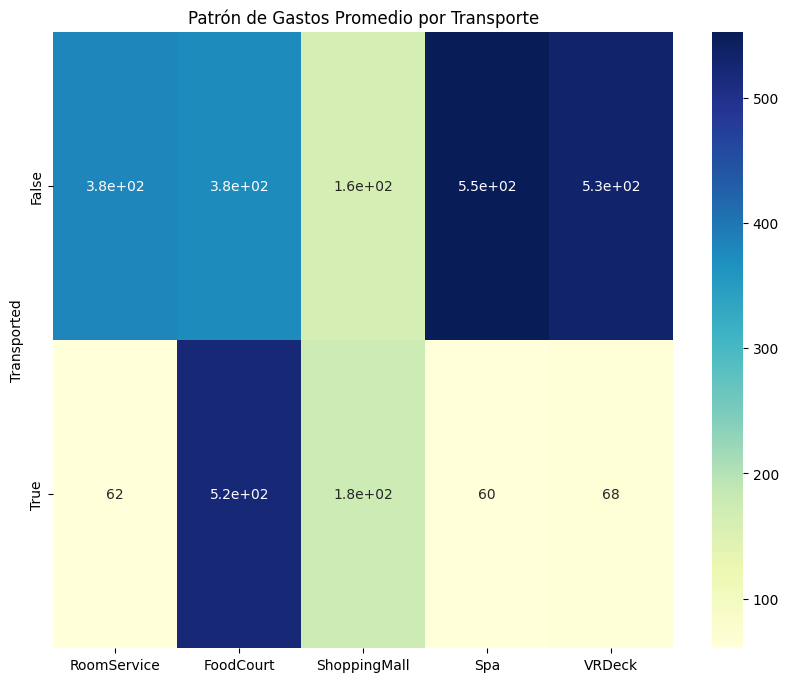

In [33]:
# Visualización Adicional 2: Heatmap de Gastos
plt.figure(figsize=(10, 8))
gastos = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]
sns.heatmap(gastos.groupby('Transported').mean(), annot=True, cmap='YlGnBu')
plt.title('Patrón de Gastos Promedio por Transporte')
plt.show()


<Figure size 1000x600 with 0 Axes>

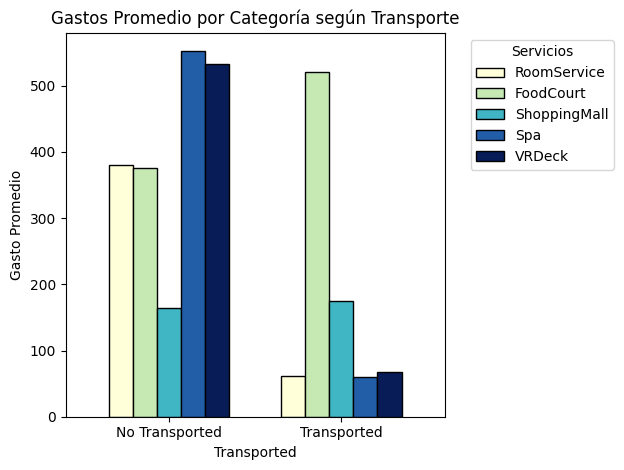

In [34]:
gastos = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]
gastos_mean = gastos.groupby('Transported').mean().reset_index()

# Crear un gráfico de barras para visualizar el promedio de gastos
plt.figure(figsize=(10, 6))
gastos_mean.set_index('Transported').plot(kind='bar', stacked=False, cmap='YlGnBu', edgecolor='black', width=0.7)
plt.title('Gastos Promedio por Categoría según Transporte')
plt.ylabel('Gasto Promedio')
plt.xlabel('Transported')
plt.xticks([0, 1], ['No Transported', 'Transported'], rotation=0)
plt.legend(title='Servicios', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

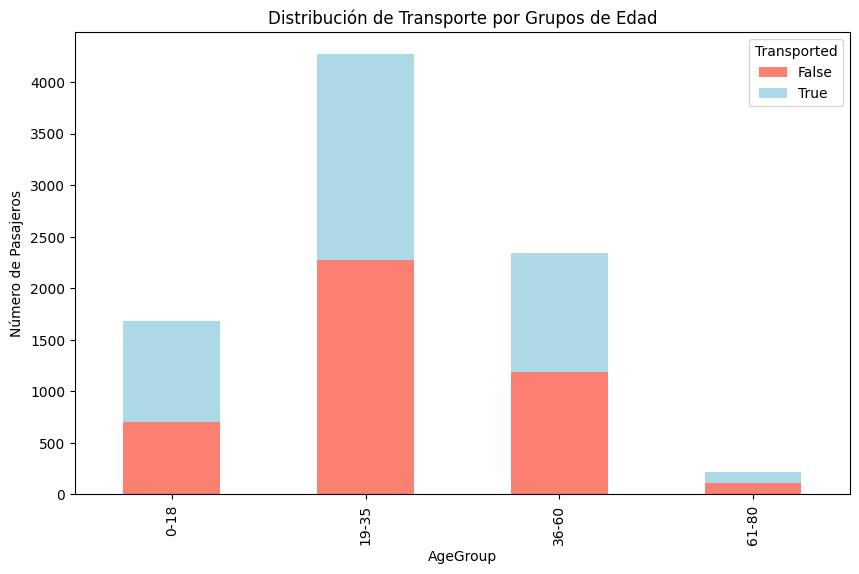

In [35]:
# Visualización Adicional 4: Gráfico de Barras Apiladas
df_ageGroup = df.copy()
df_ageGroup['AgeGroup'] = pd.cut(df_ageGroup['Age'], bins=[0, 18, 35, 60, 80], labels=['0-18', '19-35', '36-60', '61-80'])
age_transport = pd.crosstab(df_ageGroup['AgeGroup'], df_ageGroup['Transported'])
age_transport.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'], figsize=(10, 6))
plt.title('Distribución de Transporte por Grupos de Edad')
plt.ylabel('Número de Pasajeros')
plt.show()

Finalmente, convertimos la columna objetivo a 0s y 1s

In [36]:
df['Transported'] = df['Transported'].astype('category').cat.codes

# División del dataset

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [38]:
X = df.drop(columns=['Transported'])
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comparativas de modelos

A continuación, se presentan algunas comparativas de modelos de clasificación y sus métricas de evaluación

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss, accuracy_score
import pandas as pd
import lightgbm as lgb


# Lista de modelos actualizada con GradientBoosting, RandomForest, KNN y SVC
models = {
    'LG': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SGD': SGDClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'LGB': lgb.LGBMClassifier()
}

# Entrenamiento y evaluación de cada modelo
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluación de métricas; SVC y algunos otros modelos requieren predicciones probabilísticas para log_loss y roc_auc
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = None
    
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_test, y_pred),
        'Log Loss': log_loss(y_test, y_pred)
    }
    
    results.append(metrics)

# Convertir los resultados en un DataFrame para mejor visualización
df_results = pd.DataFrame(results)

# Mostrar resultados en formato de tabla con pandas
df_results


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,Log Loss
0,LG,0.775733,0.778122,0.775733,0.775102,0.775239,8.083396
1,LDA,0.750431,0.753024,0.750431,0.749966,0.750880,8.995368
2,QDA,0.738930,0.768558,0.738930,0.730887,0.737264,9.409901
3,SGD,0.748131,0.770245,0.748131,0.742347,0.746690,9.078275
4,CatBoost,0.802185,0.803155,0.802185,0.801950,0.801874,7.129969
5,Extra Trees,0.779183,0.780398,0.779183,0.779037,0.779466,7.959036
6,Bagging,0.769408,0.770549,0.769408,0.769262,0.769684,8.311389
7,XGBoost,0.787234,0.787239,0.787234,0.787220,0.787169,7.668862
8,Gradient Boosting,0.782634,0.785219,0.782634,0.781995,0.782129,7.834676
9,Random Forest,0.776883,0.777449,0.776883,0.776833,0.777064,8.041942


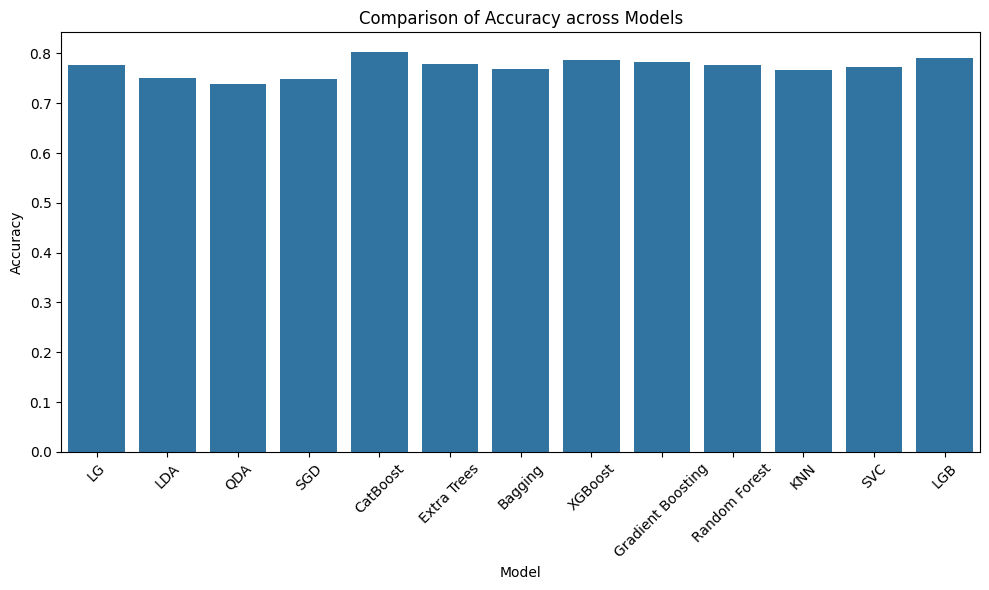

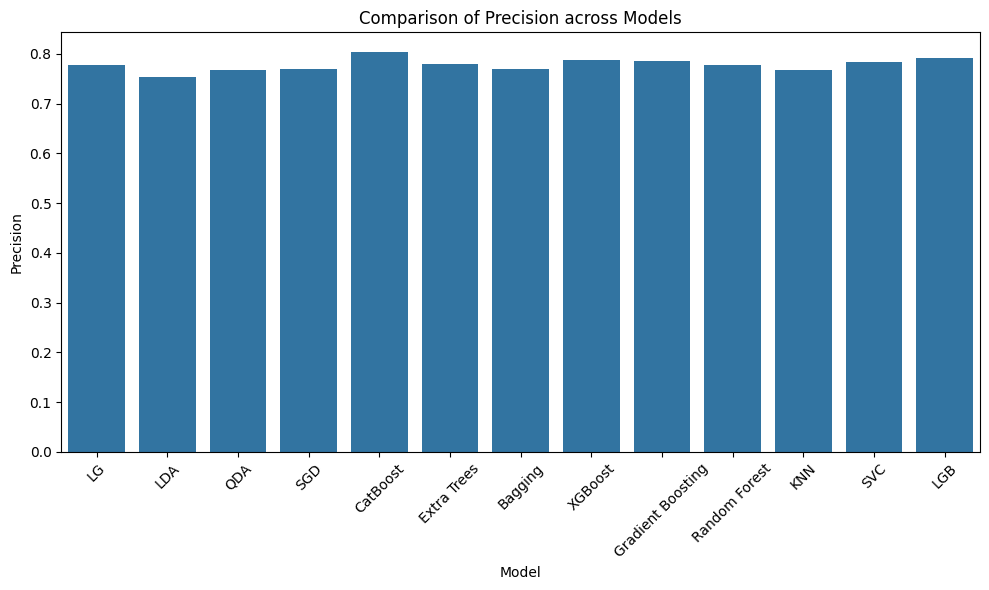

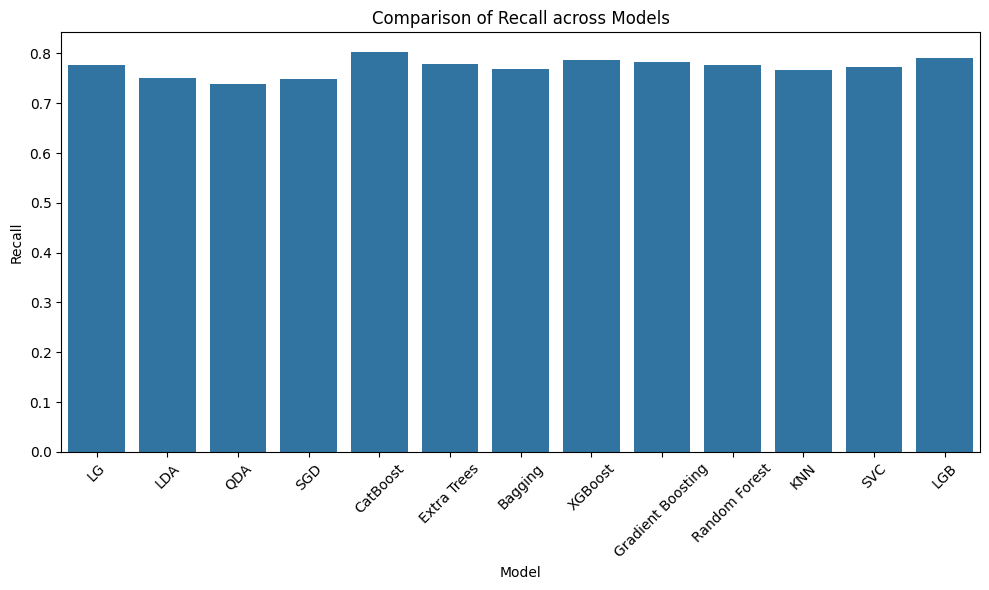

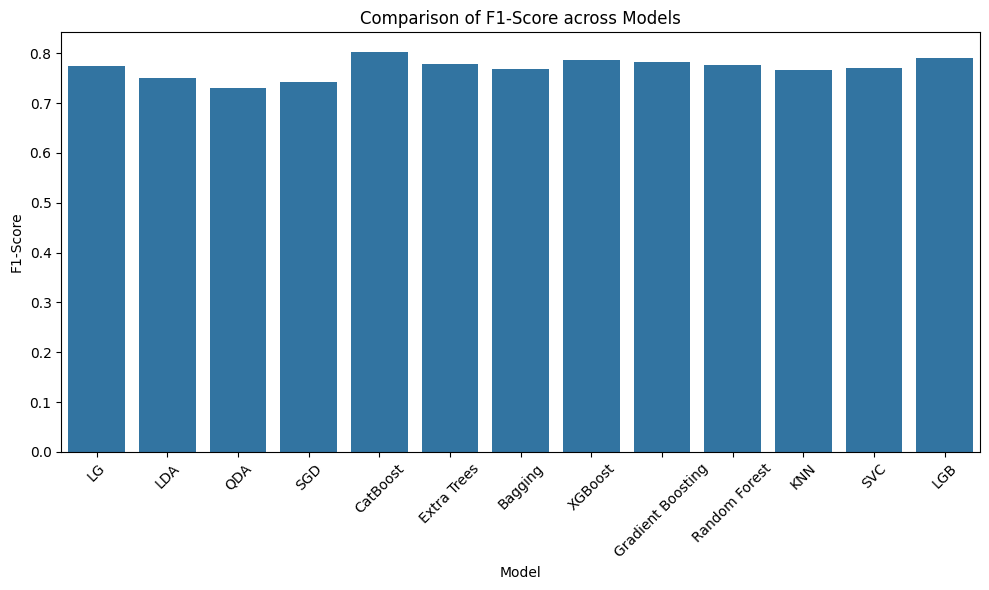

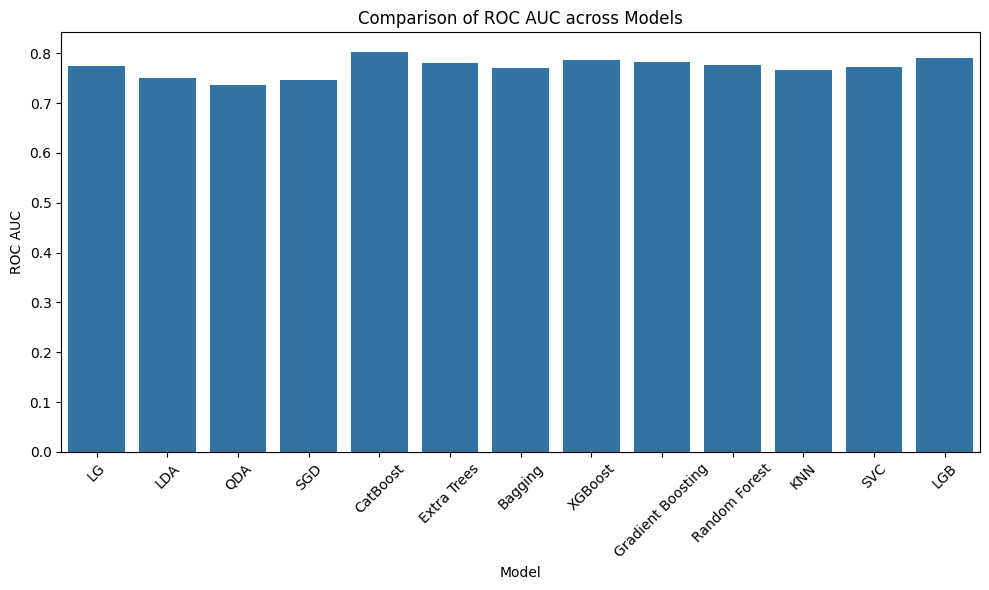

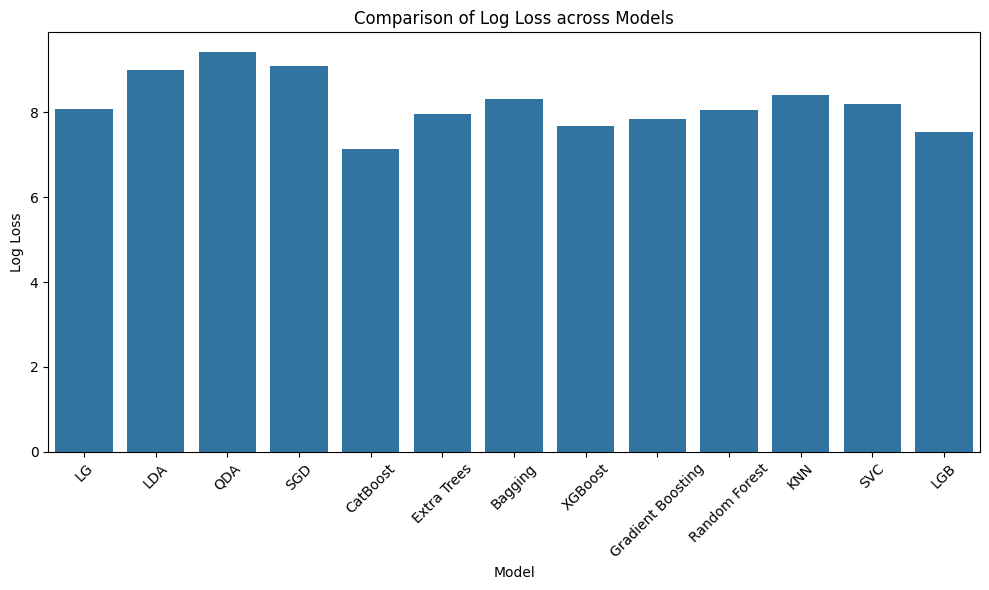

In [40]:
# Análisis y visualización de las métricas
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log Loss']

# Crear gráficos para cada métrica individual
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=df_results)
    plt.title(f'Comparison of {metric} across Models')
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()


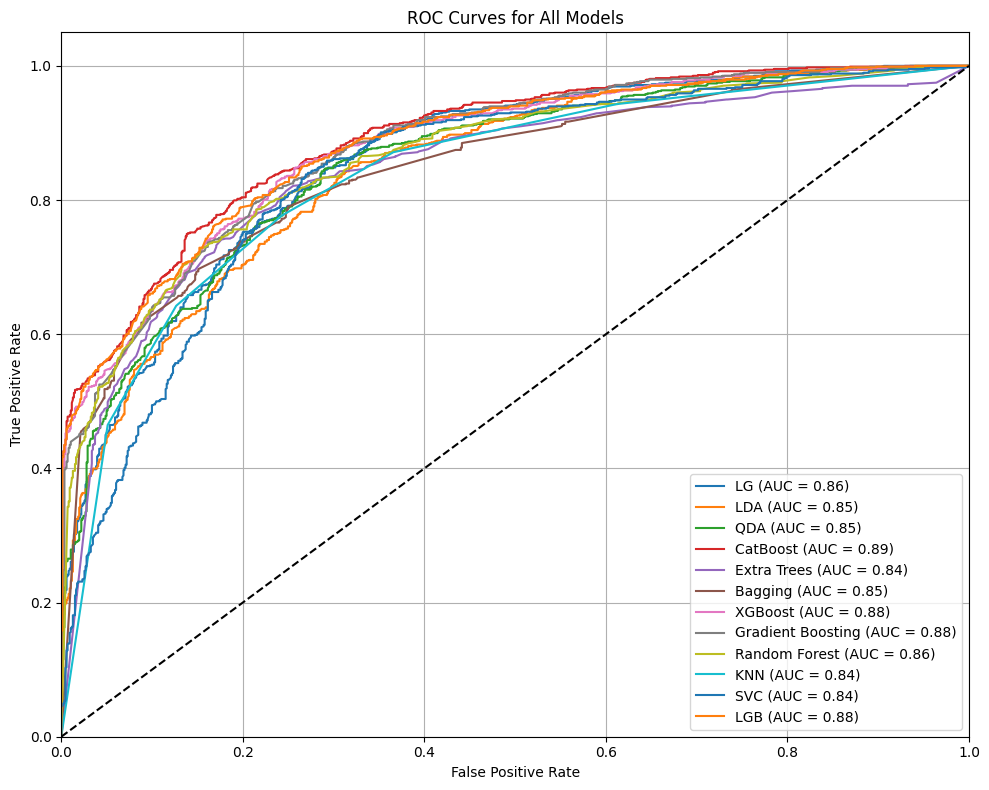

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar las etiquetas si es un problema multiclase
if len(np.unique(y_test)) > 2:
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_binarized.shape[1]
else:
    y_test_binarized = y_test
    n_classes = 1

# Crear el gráfico de ROC para cada modelo
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        if n_classes > 1:
            # Para multiclase, calcula la curva ROC para cada clase
            for i in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{name} (class {i} - AUC = {roc_auc:.2f})')
        else:
            # Para binaria
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Configuración de la gráfica
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal referencia ROC
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# Training

[LightGBM] [Info] Number of positive: 2334, number of negative: 2302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 4636, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503451 -> initscore=0.013805
[LightGBM] [Info] Start training from score 0.013805
[LightGBM] [Info] Number of positive: 2333, number of negative: 2303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1632
[LightGBM] [Info] Number of data points in the train set: 4636, number of used features: 13
[LightGBM] [Info] [binary:

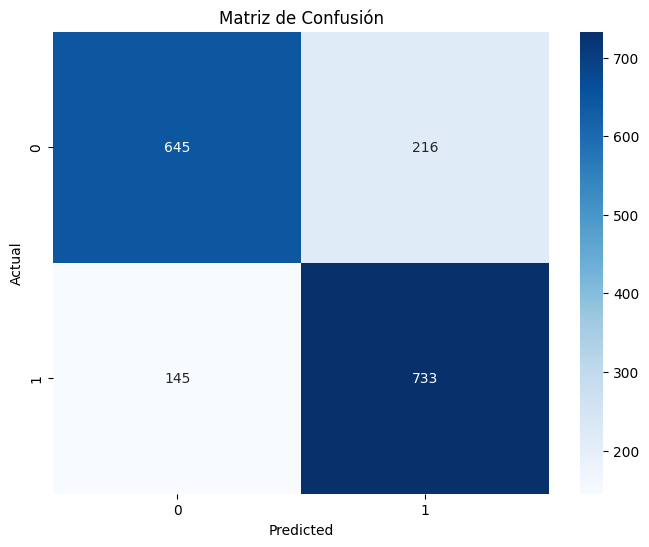

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       861
           1       0.77      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


# Definir los modelos
xgbc = xgb.XGBClassifier(verbosity=0)
lgb = lgb.LGBMClassifier()
cbc = CatBoostClassifier(verbose=0)
gb = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, subsample=0.7, max_features='log2',random_state=3)
cv_scores_gb = cross_val_score(gb, X, y, cv=8, scoring='precision')

# Definir los parámetros que se van a buscar en el GridSearch para cada modelo

# Parámetros para XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Parámetros para LightGBM
lgbm_params = {
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Parámetros para CatBoost
catboost_params = {
    'iterations': [50, 100, 200],
    'depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Hacer GridSearchCV para cada modelo
grid_xgb = GridSearchCV(estimator=xgbc, param_grid=xgb_params, scoring='accuracy', cv=3)
grid_lgb = GridSearchCV(estimator=lgb, param_grid=lgbm_params, scoring='accuracy', cv=3)
grid_catb = GridSearchCV(estimator=cbc, param_grid=catboost_params, scoring='accuracy', cv=3)

# Ajustar cada modelo con GridSearchCV
grid_xgb.fit(X_train, y_train)
grid_lgb.fit(X_train, y_train)
grid_catb.fit(X_train, y_train)

# Obtener los mejores modelos de cada GridSearch
best_xgb = grid_xgb.best_estimator_
best_lgb = grid_lgb.best_estimator_
best_catb = grid_catb.best_estimator_

# Definir el VotingClassifier con los mejores modelos
voting_clf = VotingClassifier(estimators=[('xgb', best_xgb), ('lgb', best_lgb), ('catb', best_catb), ('gb',gb)], voting='soft')

# Entrenar el VotingClassifier
voting_clf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = voting_clf.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del Voting Classifier: {accuracy:.2f}")

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

In [48]:
voting_clf

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgb',
                              LGBMClassifier(learning_rate=0.2,
                                             n_estimators=50)),
                             ('catb',
                              <catboost.core.CatBoostClassifier object at 0x375add850>),
                             ('gb',
                              GradientBoostingClassifier(max_features='log2',
                                                         n_estimators=400,
                                                         random_state=3,
                                                         subsample=0.7))],
                 voting='soft')

# Test

Para hacer las predicciones, repetimos el procesamiento que hicimos para los datos del training:

In [43]:
test_df = pd.read_csv('test.csv')
print(test_df.shape)


test_df.drop(columns=['PassengerId','Name'],inplace=True)
test_df[amenities] = test_df[amenities].fillna(0.0)

test_df['CryoSleep'] = test_df['CryoSleep'].fillna(test_df.apply(lambda row: False if any(row[amenities] > 0) else True, axis=1))
test_df['CryoSleep'] = test_df['CryoSleep'].astype('category').cat.codes

test_df['VIP'] = test_df['VIP'].fillna(test_df.apply(lambda row: False if any(row[amenities] < 1000) else True, axis=1))
test_df['Spent'] = test_df[amenities].sum(axis=1)

test_df['Destination'].fillna(test_df.apply(lambda row: 'PSO J318.5-22' if row['Spent'] < 955.3276548634975
                                  else 'TRAPPIST-1e' if 955.3276548634975 <= row['Spent'] < 1759.3127693246925
                                  else '55 Cancri e', axis=1), inplace=True)

test_df['Destination'] = test_df['Destination'].replace('55 Cancri e',0)
test_df['Destination'] = test_df['Destination'].replace('PSO J318.5-22',1)
test_df['Destination'] = test_df['Destination'].replace('TRAPPIST-1e',2)

test_df['HomePlanet'] = test_df['HomePlanet'].astype('category').cat.codes

imputer = KNNImputer(n_neighbors=5)
test_df[['HomePlanet', 'Age']] = imputer.fit_transform(test_df[['HomePlanet', 'Age']])

test_df[['Zona', 'Seat', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
test_df.drop(columns=['Cabin'], inplace=True)
test_df['Side'] = test_df['Side'].astype('category').cat.codes

test_df['Zona'].replace('G', 0, inplace=True)
test_df['Zona'].replace('F', 1, inplace=True)
test_df['Zona'].replace('E', 2, inplace=True)
test_df['Zona'].replace('D', 3, inplace=True)
test_df['Zona'].replace('B', 4, inplace=True)
test_df['Zona'].replace('A', 5, inplace=True)
test_df['Zona'].replace('C', 6, inplace=True)
test_df['Zona'].replace('T', 7, inplace=True)

test_df['Zona'] = imputer.fit_transform(test_df[['Zona']])

test_df.drop(columns=['Seat'],inplace=True)

(4277, 13)


/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/163128381.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['CryoSleep'] = test_df['CryoSleep'].fillna(test_df.apply(lambda row: False if any(row[amenities] > 0) else True, axis=1))
/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11429/163128381.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['VIP'] = test_df['VIP'].fillna(test_df.apply(lambda row: False if any(row[amenities] < 1000) else True, axis=1))
/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipyke

In [44]:
# Realizar predicciones en el conjunto de prueba
preds = voting_clf.predict(test_df)
final_preds = preds.astype(bool)
len(final_preds)

4277

In [45]:
preds = pd.DataFrame(final_preds)
ids = pd.read_csv('test.csv')
ids = ids[['PassengerId']]
ids['Transported'] = final_preds
ids.to_csv('preds45.csv',index=False)

###  0.80780 en kaggle